Read the image and convert it from BGR to RGB.

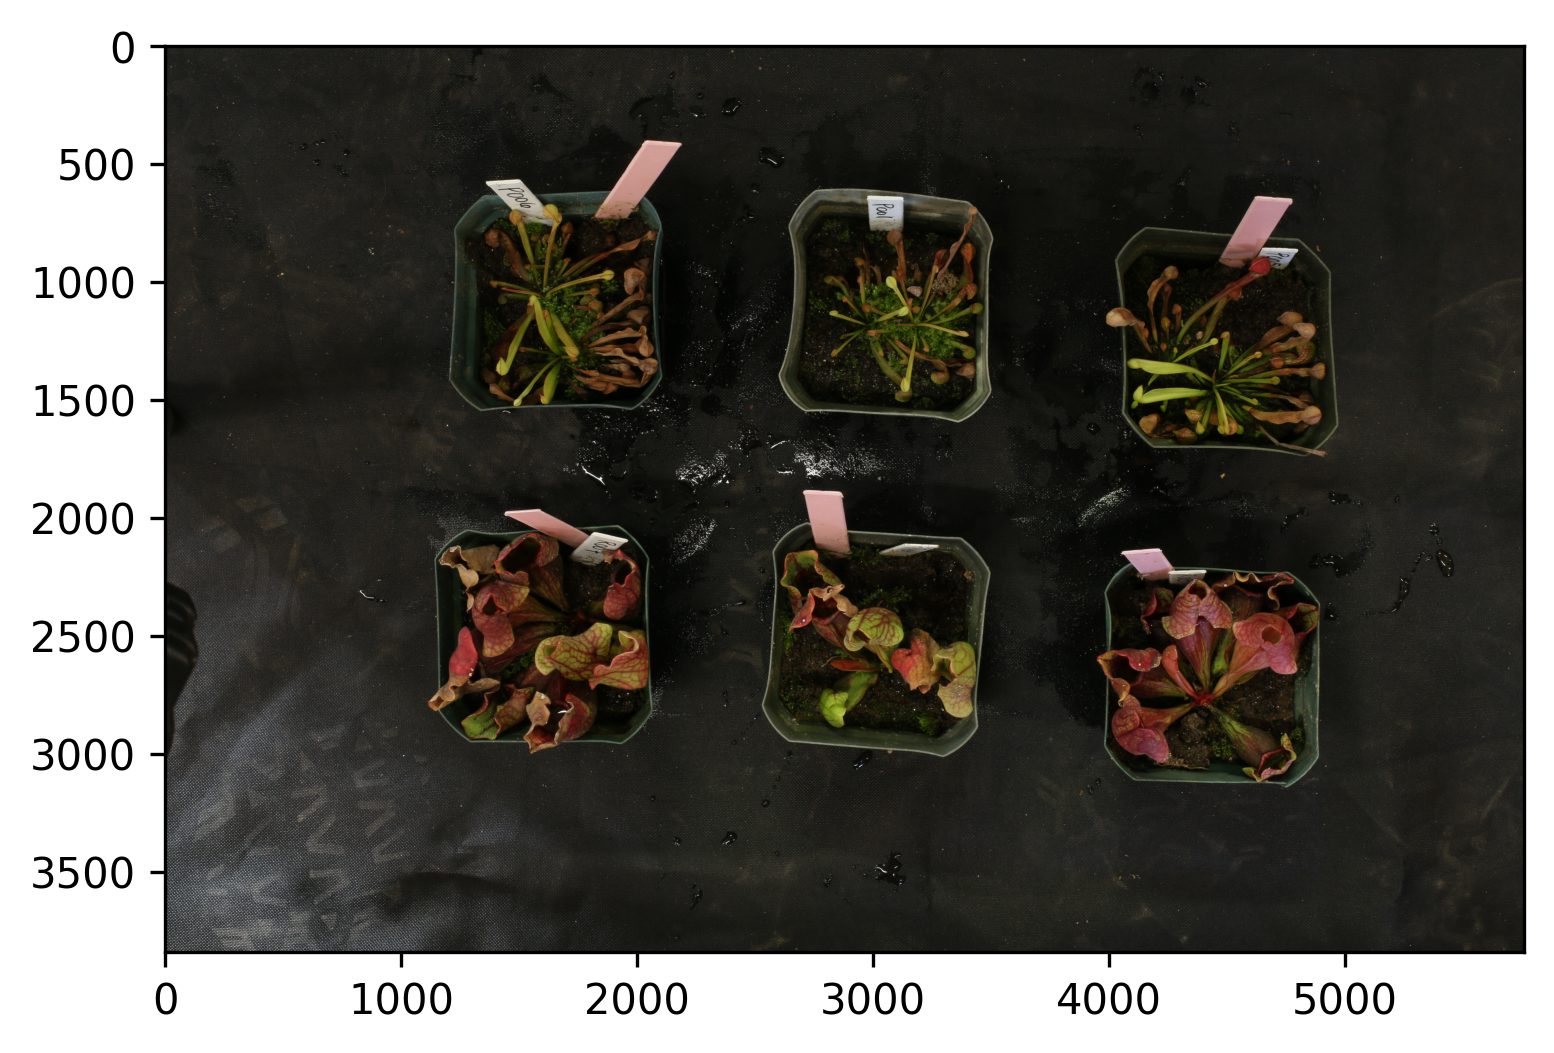

In [33]:
import cv2
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

image = cv2.imread('../data_mason/1_14_19.10_30_20.5V4B3121.JPG')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(rgb)
plt.show()

Blur the image.

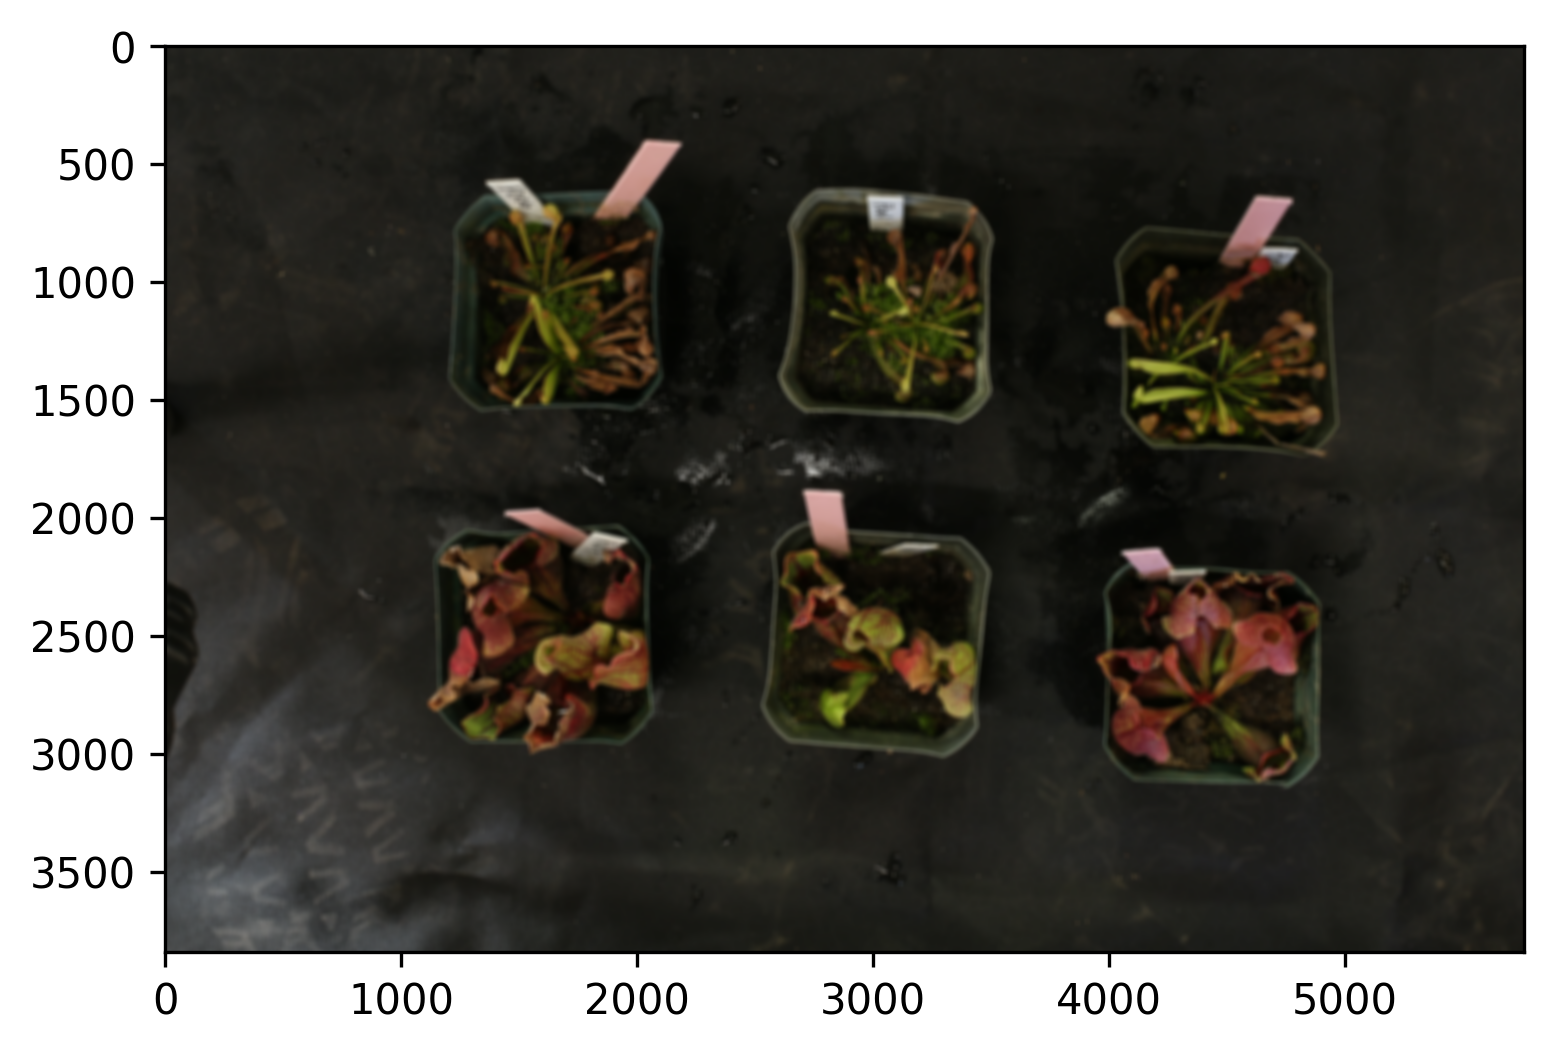

In [34]:
blur = cv2.blur(rgb, (25, 25))
gblur = cv2.GaussianBlur(blur, (11, 75), cv2.BORDER_DEFAULT)

plt.imshow(gblur)
plt.show()

Convert to HSV and find color mask.

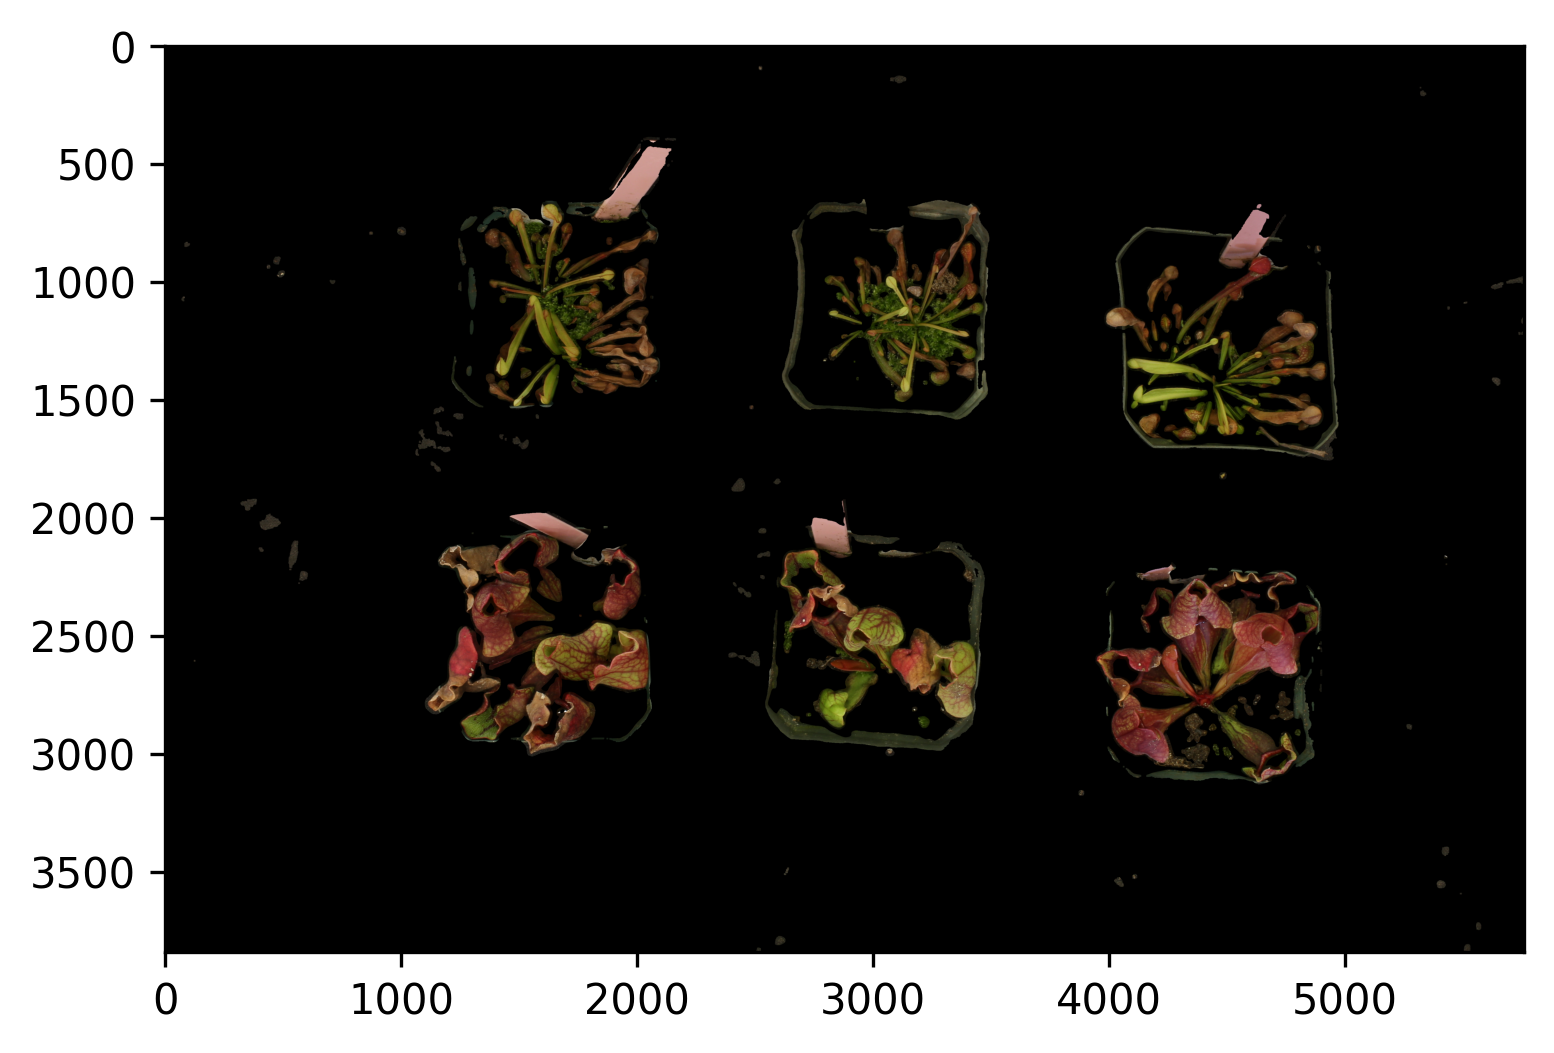

In [35]:
import numpy as np

hsv = cv2.cvtColor(gblur, cv2.COLOR_RGB2HSV)

lower_blue = np.array([0, 70, 40])
upper_blue = np.array([179, 255, 255])

mask = cv2.inRange(hsv, lower_blue, upper_blue)
opened = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))
dilated = cv2.dilate(opened, np.ones((5, 5)))

masked = cv2.bitwise_and(image, image, mask=dilated)

rgb_masked = cv2.cvtColor(masked, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_masked)
plt.show()

Detect N largest contours.

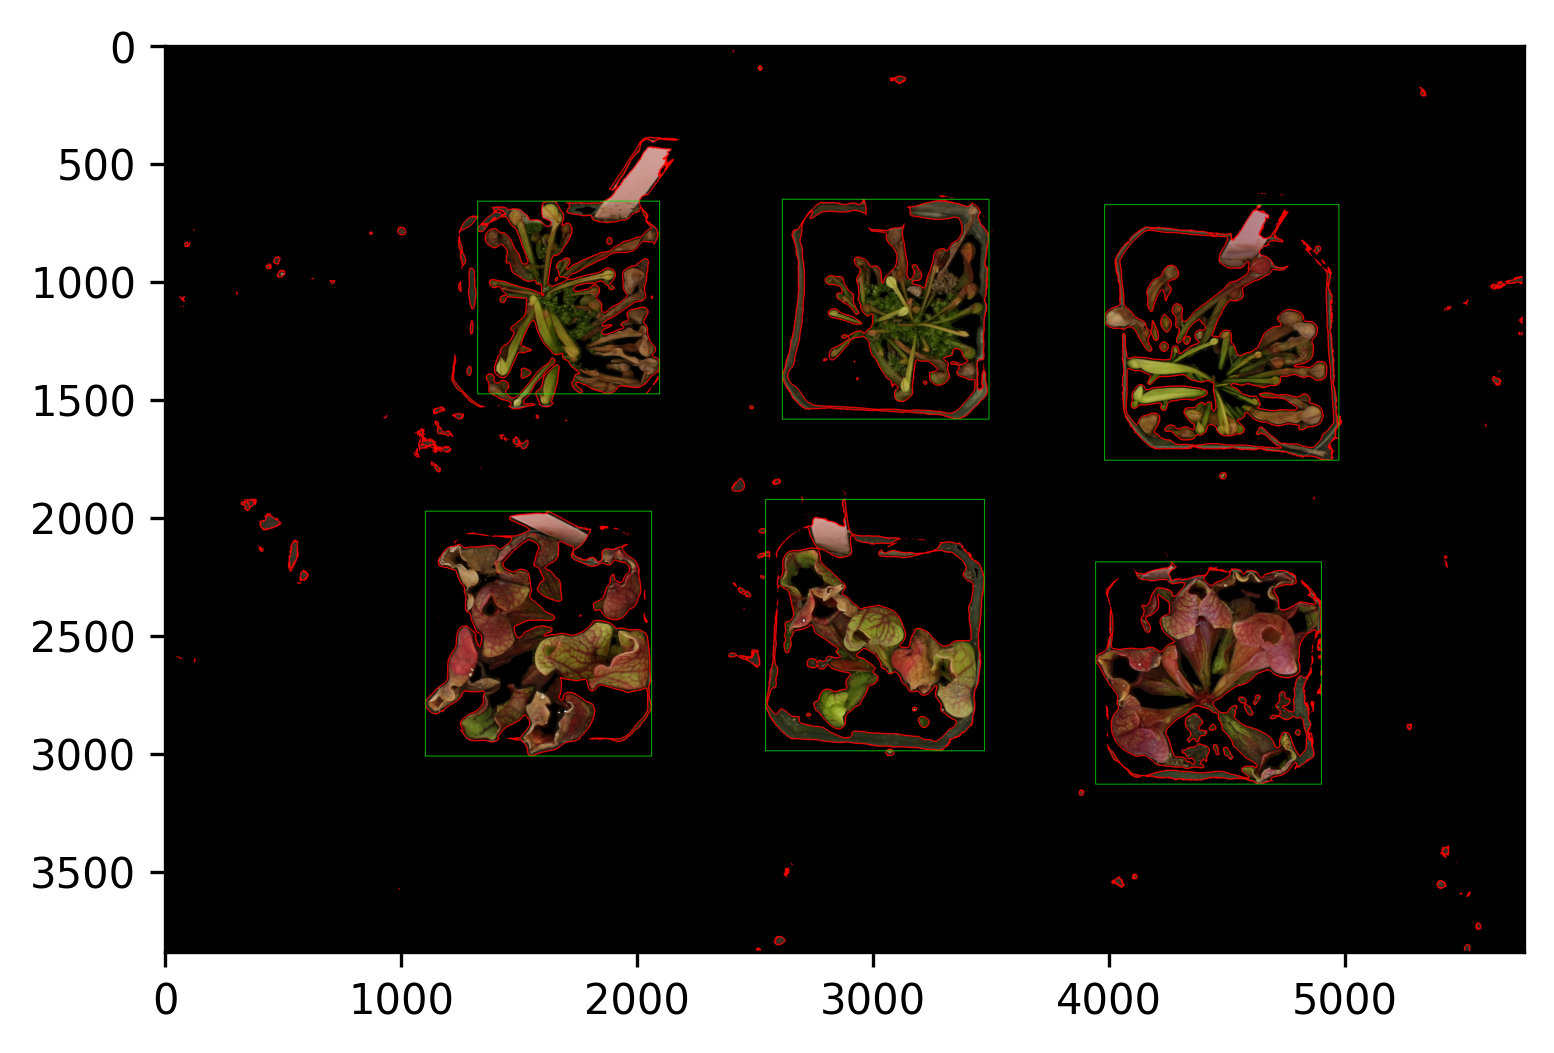

1117


In [41]:
from heapq import nlargest

ctrs = rgb_masked.copy()
_, thresh = cv2.threshold(mask, 40, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(ctrs, contours, -1, 255, 3)
largest = nlargest(6, contours, key = cv2.contourArea)
for c in largest:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(ctrs, (x,y), (x+w,y+h),(0,255,0),2)
plt.imshow(ctrs)
plt.show()
print(len(contours))

# TODO crop image to N largest contours and do color analysis within each